# Gradient Descent

### Implementing `Batch` vs `Mini-batch` vs `Stochastic` Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from plot_gradient_descent import plot_animate_data
from matplotlib.animation import FuncAnimation
# Set up formatting for the movie files
from matplotlib.animation import writers
from IPython.display import Video

### Functions for Perceptron with 3 types of Gradient Descent

In [2]:
# linear regression using gradient descent
# function to compute hypothesis / predictions
def hypothesis(X, weights, bias):
    return np.dot(X, weights) + bias
  
# function to compute gradient of error function w.r.t. weights
def gradient(X, y, weights, bias, learning_rate):
    h = hypothesis(X, weights, bias)
    m = len(y)
    grad_w = learning_rate * (1/m) * np.dot(X.T, (h - y))
    grad_b = learning_rate * (1/m) * np.sum(h - y)
    return grad_w, grad_b

def cost(X, y, weights, bias):
    h = hypothesis(X, weights, bias)
    m = len(y)
    J = (1/2*m) * np.sum(np.square(h - y))
    return J

def iterate_minibatches(X, y, batch_size, shuffle=False):
    assert X.shape[0] == y.shape[0]
    if shuffle:
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
    for start_idx in range(0, X.shape[0], batch_size):
        end_idx = min(start_idx + batch_size, X.shape[0])
        if shuffle:
            excerpt = indices[start_idx:end_idx]
        else:
            excerpt = slice(start_idx, end_idx)
        yield X[excerpt], y[excerpt]


def random_sample_batches(X, y, batch_size):
    assert X.shape[0] == y.shape[0]
    indexes = np.random.randint(0, X.shape[0], batch_size) # random sample indexes
    X_tr = X[indexes, :]
    y_tr = y[indexes]
    return X_tr, y_tr
    

# function to perform batch gradient descent
def batch_gradient_descent(X, y, learning_rate = 0.001, epochs = 10):
    weights = np.zeros((X.shape[1], 1))
    bias = 0
    error_list = []
    weights_list = []
    bias_list = []
    for _ in range(epochs):
        grad_w, grad_b = gradient(X, y, weights, bias, learning_rate)
        weights = weights - grad_w
        bias = bias - grad_b
        J = cost(X, y, weights, bias)
        print("Epoch: {}, Cost: {}".format(_, J))
        error_list.append(J)
        weights_list.append(weights[0])
        bias_list.append(bias)

    return weights_list, bias_list, error_list

# function to perform stochastic gradient descent
def stochastic_gradient_descent(X, y, learning_rate = 0.001, epochs = 10, batch_size=32):
    weights = np.zeros((X.shape[1], 1))
    bias = 0
    error_list = []
    weights_list = []
    bias_list = []
    for _ in range(epochs):
        X_tr, y_tr = random_sample_batches(X, y, batch_size)
        grad_w, grad_b = gradient(X_tr,y_tr, weights, bias, learning_rate)
        weights = weights - grad_w
        bias = bias - grad_b
        J = cost(X_tr,y_tr, weights, bias)
        error_list.append(J)
        weights_list.append(weights[0])
        bias_list.append(bias)
        print("Epoch: {}, Cost: {}".format(_, J))
  
    return weights_list, bias_list, error_list

# function to perform mini-batch gradient descent
def mini_batch_gradient_descent(X, y, learning_rate = 0.001, batch_size = 32, epochs = 10):
    weights = np.zeros((X.shape[1], 1))
    bias = 0
    error_list = []
    weights_list = []
    bias_list = []
    for _ in range(epochs):
        mini_batches = iterate_minibatches(X, y, batch_size, shuffle=True)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            grad_w, grad_b = gradient(X_mini, y_mini, weights, bias, learning_rate)
            weights = weights - grad_w
            bias = bias - grad_b
            J = []
            J.append(cost(X_mini, y_mini, weights, bias))
        error_list.append(np.sum(np.array(J))/batch_size)
        weights_list.append(weights[0])
        bias_list.append(bias)
        print("Epoch: {}, Cost: {}".format(_, error_list[_]))
  
    return weights_list, bias_list, error_list

### Defining the Data

In [18]:
X, y = datasets.make_regression(
        n_samples=100, n_features=1, noise=20, random_state=4)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = y.reshape(-1, 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 1) (20, 1) (80, 1) (20, 1)


### Batch Gradient Descent

In [21]:
weights_list, bias_list, error_list = batch_gradient_descent(X, y, learning_rate = 0.001, epochs=1000)

Epoch: 0, Cost: 27804067.855405882
Epoch: 1, Cost: 27577558.032990877
Epoch: 2, Cost: 27366210.4445191
Epoch: 3, Cost: 27166700.41340484
Epoch: 4, Cost: 26976484.111680724
Epoch: 5, Cost: 26793614.811231453
Epoch: 6, Cost: 26616602.376933843
Epoch: 7, Cost: 26444305.825497966
Epoch: 8, Cost: 26275851.168591436
Epoch: 9, Cost: 26110568.59004561
Epoch: 10, Cost: 25947944.407215428
Epoch: 11, Cost: 25787584.33730845
Epoch: 12, Cost: 25629185.4082622
Epoch: 13, Cost: 25472514.47983111
Epoch: 14, Cost: 25317391.81928938
Epoch: 15, Cost: 25163678.542237222
Epoch: 16, Cost: 25011267.00892824
Epoch: 17, Cost: 24860073.480589468
Epoch: 18, Cost: 24710032.50388587
Epoch: 19, Cost: 24561092.616841953
Epoch: 20, Cost: 24413213.065239556
Epoch: 21, Cost: 24266361.29169498
Epoch: 22, Cost: 24120511.015579414
Epoch: 23, Cost: 23975640.764738858
Epoch: 24, Cost: 23831732.752690893
Epoch: 25, Cost: 23688772.01999694
Epoch: 26, Cost: 23546745.777641412
Epoch: 27, Cost: 23405642.90487938
Epoch: 28, Cost:

Bias =  -171.22125298660305
Weights = 
 [349.23492158]


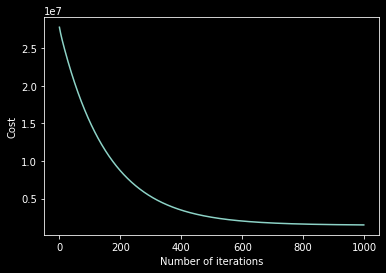

In [22]:
print("Bias = ", bias_list[-1])
print("Weights = \n", weights_list[-1])
  
# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

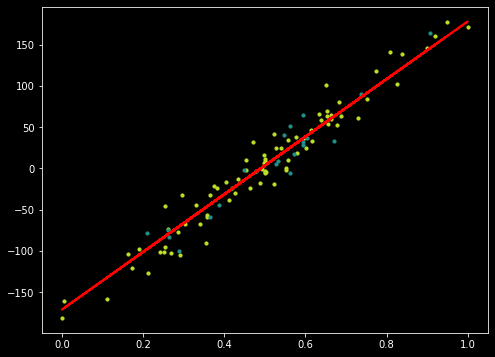

Mean absolute error =  8136.866208452503


In [23]:
y_pred = hypothesis(X, weights_list[-1], bias_list[-1])
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred, color="red", linewidth=2, label="Prediction")
plt.show()

# calculating error in predictions
error = np.sum(np.abs(y - y_pred) / y.shape[0])
print("Mean absolute error = ", error)

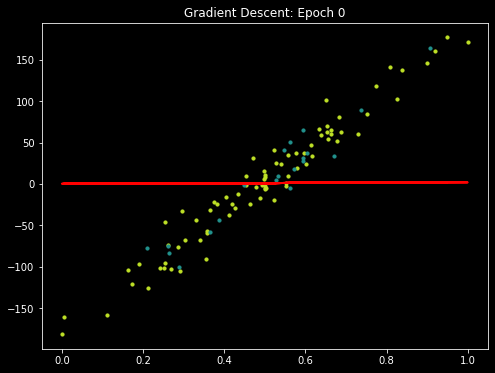

In [9]:
y_pred = (np.dot(weights_list, X.T) + np.array(bias_list).reshape(-1, 1))

fig = plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
line, = plt.plot(X, y_pred[0], color="red", linewidth=2, label="Prediction")

def animate(i):
    plt.title(f"Gradient Descent: Epoch {i}")
    line.set_ydata(y_pred[i])  # update the data
    return line,

animation = FuncAnimation(fig, animate, frames=len(weights_list), interval=1)

Writer = writers['ffmpeg']
writer = Writer(fps=12.5)

# save an mp4 of the animation
animation.save('batch.mp4', writer=writer)

In [53]:
Video("batch.mp4")

### Stochastic Gradient Descent

In [36]:
weights_list, bias_list, error_list = stochastic_gradient_descent(X, y, learning_rate = 0.001, batch_size=60, epochs=1000)

Epoch: 0, Cost: 8321321.246037806
Epoch: 1, Cost: 10041103.166457072
Epoch: 2, Cost: 8106252.241271823
Epoch: 3, Cost: 10901641.981594529
Epoch: 4, Cost: 8331708.835690723
Epoch: 5, Cost: 8878696.037970548
Epoch: 6, Cost: 12418924.524256352
Epoch: 7, Cost: 10887383.204029435
Epoch: 8, Cost: 8009260.614015775
Epoch: 9, Cost: 10051678.695752494
Epoch: 10, Cost: 9025741.979197338
Epoch: 11, Cost: 11022287.598718321
Epoch: 12, Cost: 8647456.541937616
Epoch: 13, Cost: 7076219.519332968
Epoch: 14, Cost: 10734009.160039552
Epoch: 15, Cost: 10610907.825599829
Epoch: 16, Cost: 10088381.859055914
Epoch: 17, Cost: 6730015.246453517
Epoch: 18, Cost: 10526731.139847443
Epoch: 19, Cost: 10825195.196811214
Epoch: 20, Cost: 7348110.126824755
Epoch: 21, Cost: 9957842.919487895
Epoch: 22, Cost: 9703585.622871235
Epoch: 23, Cost: 11955149.515660366
Epoch: 24, Cost: 9473612.002233172
Epoch: 25, Cost: 11168022.281059438
Epoch: 26, Cost: 10051219.804387107
Epoch: 27, Cost: 7375749.732304475
Epoch: 28, Cost:

Bias =  -152.3218144784275
Weights = 
 [311.40340101]


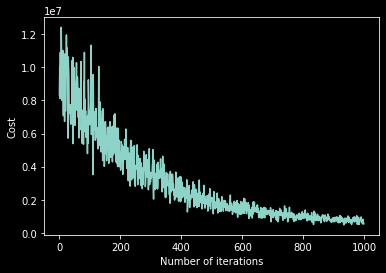

In [37]:
print("Bias = ", bias_list[-1])
print("Weights = \n", weights_list[-1])
  
# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

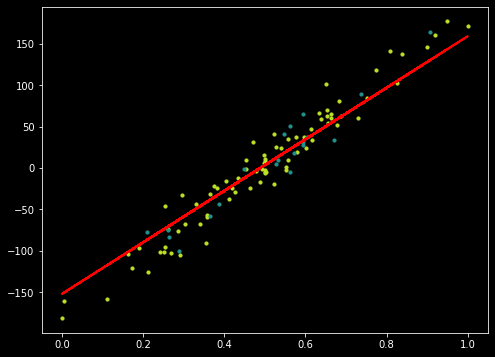

Mean absolute error =  7739.735902609333


In [38]:
y_pred = hypothesis(X, weights_list[-1], bias_list[-1])
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred, color="red", linewidth=2, label="Prediction")
plt.show()

# calculating error in predictions
error = np.sum(np.abs(y - y_pred) / y.shape[0])
print("Mean absolute error = ", error)

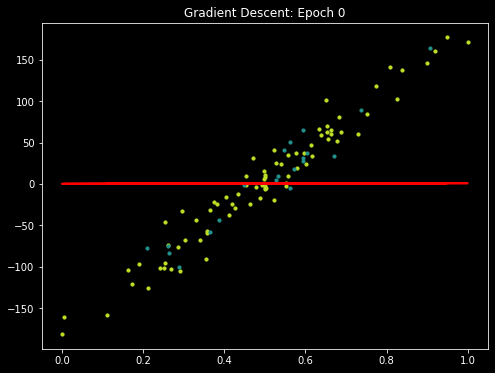

In [39]:
y_pred = (np.dot(weights_list, X.T) + np.array(bias_list).reshape(-1, 1))

fig = plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
line, = plt.plot(X, y_pred[0], color="red", linewidth=2, label="Prediction")

def animate(i):
    plt.title(f"Gradient Descent: Epoch {i}")
    line.set_ydata(y_pred[i])  # update the data
    return line,

animation = FuncAnimation(fig, animate, frames=len(weights_list), interval=1)

Writer = writers['ffmpeg']
writer = Writer(fps=12.5)

# save an mp4 of the animation
animation.save('stochastic.mp4', writer=writer)

In [40]:
Video("stochastic.mp4")

### Mini-Batch Gradient Descent 

In [48]:
weights, bias, error_list = mini_batch_gradient_descent(X, y, learning_rate = 0.001, batch_size=60, epochs=1000)

Epoch: 0, Cost: 88600.30800712436
Epoch: 1, Cost: 76791.82135261015
Epoch: 2, Cost: 57250.45460956061
Epoch: 3, Cost: 63806.59179387487
Epoch: 4, Cost: 79351.42256508005
Epoch: 5, Cost: 60687.69257487932
Epoch: 6, Cost: 75442.09306772306
Epoch: 7, Cost: 77415.26281302868
Epoch: 8, Cost: 68068.06609519217
Epoch: 9, Cost: 63279.29623334125
Epoch: 10, Cost: 97200.98852889585
Epoch: 11, Cost: 70195.87361799066
Epoch: 12, Cost: 96217.8460910455
Epoch: 13, Cost: 64165.950575098315
Epoch: 14, Cost: 54631.26713664922
Epoch: 15, Cost: 69656.64510277318
Epoch: 16, Cost: 77429.39842719186
Epoch: 17, Cost: 84749.46888314579
Epoch: 18, Cost: 68747.54408642248
Epoch: 19, Cost: 66582.23232554497
Epoch: 20, Cost: 75790.84368507299
Epoch: 21, Cost: 83738.38311992298
Epoch: 22, Cost: 81029.56724908155
Epoch: 23, Cost: 59818.003058182425
Epoch: 24, Cost: 65066.90297523312
Epoch: 25, Cost: 58770.86456875762
Epoch: 26, Cost: 71465.17998514224
Epoch: 27, Cost: 66277.11515705365
Epoch: 28, Cost: 62553.904838

Bias =  -152.3218144784275
Weights = 
 [311.40340101]


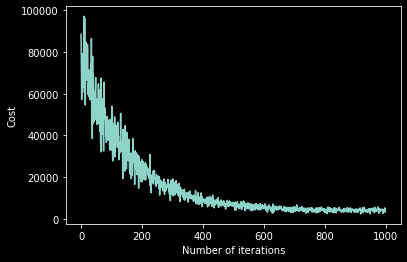

In [49]:
print("Bias = ", bias_list[-1])
print("Weights = \n", weights_list[-1])
  
# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

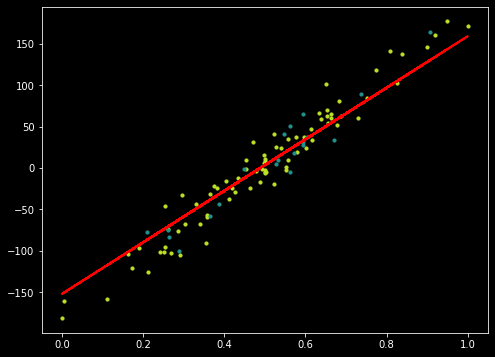

Mean absolute error =  7739.735902609333


In [50]:
y_pred = hypothesis(X, weights_list[-1], bias_list[-1])
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred, color="red", linewidth=2, label="Prediction")
plt.show()

# calculating error in predictions
error = np.sum(np.abs(y - y_pred) / y.shape[0])
print("Mean absolute error = ", error)

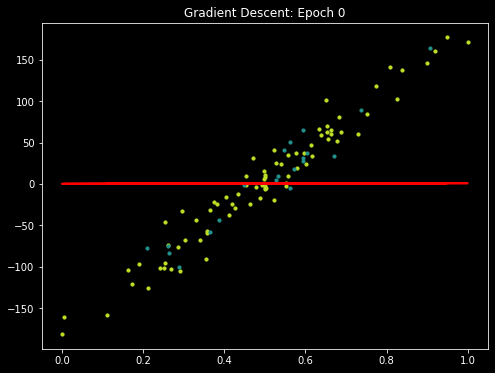

In [51]:
y_pred = (np.dot(weights_list, X.T) + np.array(bias_list).reshape(-1, 1))

fig = plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
line, = plt.plot(X, y_pred[0], color="red", linewidth=2, label="Prediction")

def animate(i):
    plt.title(f"Gradient Descent: Epoch {i}")
    line.set_ydata(y_pred[i])  # update the data
    return line,

animation = FuncAnimation(fig, animate, frames=len(weights_list), interval=1)

Writer = writers['ffmpeg']
writer = Writer(fps=12.5)

# save an mp4 of the animation
animation.save('mini_batch.mp4', writer=writer)

In [52]:
Video("mini_batch.mp4")